In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
pip install gensim

In [ ]:
pip install nltk

In [ ]:
pip install spacy

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.9 MB/s eta 0:00:00


In [ ]:
pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.5 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import spacy  # Import spaCy library
from gensim import corpora, models
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors
from reportlab.platypus import Table, TableStyle

In [ ]:
# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Load the spaCy NER model
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def analyze_text(user_input):
    # Tokenize the input text into sentences and words
    sentences = sent_tokenize(user_input)
    words = word_tokenize(user_input)

    # Remove stopwords (common words like 'the', 'is', etc.)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

    # Calculate word frequency distribution
    fdist = FreqDist(filtered_words)

    return {
        'sentences': sentences,
        'word_count': len(words),
        'unique_words': len(set(filtered_words)),
        'most_common_words': fdist.most_common(10)
    }


In [ ]:
def perform_topic_modeling(user_input):
    # Tokenize and preprocess the input text
    sentences = sent_tokenize(user_input)
    words = word_tokenize(user_input)

    # Remove stopwords (common words like 'the', 'is', etc.)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

    # Create a dictionary and corpus
    dictionary = corpora.Dictionary([filtered_words])
    corpus = [dictionary.doc2bow(filtered_words)]

    # Apply LDA
    lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary)

    topics = lda_model.print_topics()
    return {
        'sentences': sentences,
        'word_count': len(words),
        'unique_words': len(set(filtered_words)),
        'most_common_words': FreqDist(filtered_words).most_common(10),
        'topics': topics
    }

In [ ]:
def perform_sentiment_analysis(user_input):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(user_input)

    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
def text_summarization(user_input):
    # Load the pre-trained GPT-2 model and tokenizer
    model_name = "gpt2"  # You can choose another variant if needed
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)

    # Tokenize the input text
    input_ids = tokenizer.encode(user_input, return_tensors="pt", max_length=1024, truncation=True)

    # Calculate a reasonable max_length based on the input length
    max_length = len(input_ids[0]) + 50  # You can adjust this number as needed

    # Generate a summary using the model
    summary_ids = model.generate(input_ids, max_length=max_length, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Decode the summary and return it as a string
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary



In [ ]:
def perform_ner(user_input):
    # Use spaCy NER model to extract named entities
    doc = nlp(user_input)
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]
    return named_entities
def create_visual_report(analysis_result, lda_result, sentiment, summary):
    # Visualization for word frequency distribution
    most_common_words = analysis_result['most_common_words']
    words, frequencies = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies)
    plt.title('Top 10 Most Common Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.gca().invert_yaxis()  # Invert the y-axis for better readability
    plt.show()

    # Visualize sentiment
    plt.figure(figsize=(6, 4))
    plt.pie([sentiment.count("Positive"), sentiment.count("Negative"), sentiment.count("Neutral")],
            labels=["Positive", "Negative", "Neutral"],
            autopct='%1.1f%%',
            startangle=140)
    plt.title('Sentiment Analysis')
    plt.show()

In [ ]:
def create_pdf_report(analysis_result, lda_result, sentiment, summary):
    doc = SimpleDocTemplate("analysis_report.pdf", pagesize=letter)
    styles = getSampleStyleSheet()

    # Create a list of elements to be included in the PDF
    elements = []

    # Add the title to the PDF
    title = Paragraph("Text Analysis Report", styles['Title'])
    elements.append(title)
    elements.append(Paragraph("Analysis Results:", styles['Heading1']))
    elements.append(Spacer(1, 12))
    elements.append(Paragraph(f"Sentences: {analysis_result['sentences']}", styles['Normal']))
    elements.append(Paragraph(f"Total Word Count: {analysis_result['word_count']}", styles['Normal']))
    elements.append(Paragraph(f"Unique Words: {analysis_result['unique_words']}", styles['Normal']))
    elements.append(Paragraph("Most Common Words:", styles['Normal']))
    elements.append(Paragraph("Text_Summary:", styles['Normal']))
    for word, frequency in analysis_result['most_common_words']:
         elements.append(Paragraph(f"{word}: {frequency}", styles['Normal']))
    most_common_words = analysis_result['most_common_words']
    words, frequencies = zip(*most_common_words)
    data = [list(words), list(frequencies)]  # Convert tuples to lists
    table = Table(data, colWidths=150, rowHeights=20)
    table.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                              ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                              ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                              ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                              ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                              ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                              ('GRID', (0, 0), (-1, -1), 1, colors.black)]))
    elements.append(Paragraph("Top 3 Most Common Words:", styles['Heading1']))
    elements.append(Spacer(1, 12))
    elements.append(table)

    # Create the PDF document
    doc.build(elements)


Enter text for analysis and summarization: Better care for chronic conditions: Telemedicine can help patients with chronic conditions to manage their health more effectively, allowing them to receive regular check-ups and treatment without the need to travel long distances. This can improve the quality of life for these individuals and reduce the risk of complications from their conditions.  Increased flexibility for patients and healthcare providers: Telemedicine allows patients and providers to schedule consultations at times convenient for them, improving the overall flexibility of the healthcare system. This can help to reduce wait times and improve patient satisfaction.  Increased accessibility: Telemedicine makes healthcare more accessible to people living in rural and remote areas, who may not have easy access to medical facilities. With telemedicine, patients can consult with doctors and specialists from their homes using their phones, computers, or other devices. This means th

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Analysis Results:
Sentences: ['Better care for chronic conditions: Telemedicine can help patients with chronic conditions to manage their health more effectively, allowing them to receive regular check-ups and treatment without the need to travel long distances.', 'This can improve the quality of life for these individuals and reduce the risk of complications from their conditions.', 'Increased flexibility for patients and healthcare providers: Telemedicine allows patients and providers to schedule consultations at times convenient for them, improving the overall flexibility of the healthcare system.', 'This can help to reduce wait times and improve patient satisfaction.', 'Increased accessibility: Telemedicine makes healthcare more accessible to people living in rural and remote areas, who may not have easy access to medical facilities.', 'With telemedicine, patients can consult with doctors and specialists from their homes using their phones, computers, or other devices.', 'This mea

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Text Summary: Better care for chronic conditions: Telemedicine can help patients with chronic conditions to manage their health more effectively, allowing them to receive regular check-ups and treatment without the need to travel long distances. This can improve the quality of life for these individuals and reduce the risk of complications from their conditions.  Increased flexibility for patients and healthcare providers: Telemedicine allows patients and providers to schedule consultations at times convenient for them, improving the overall flexibility of the healthcare system. This can help to reduce wait times and improve patient satisfaction.  Increased accessibility: Telemedicine makes healthcare more accessible to people living in rural and remote areas, who may not have easy access to medical facilities. With telemedicine, patients can consult with doctors and specialists from their homes using their phones, computers, or other devices. This means that more people will be able t

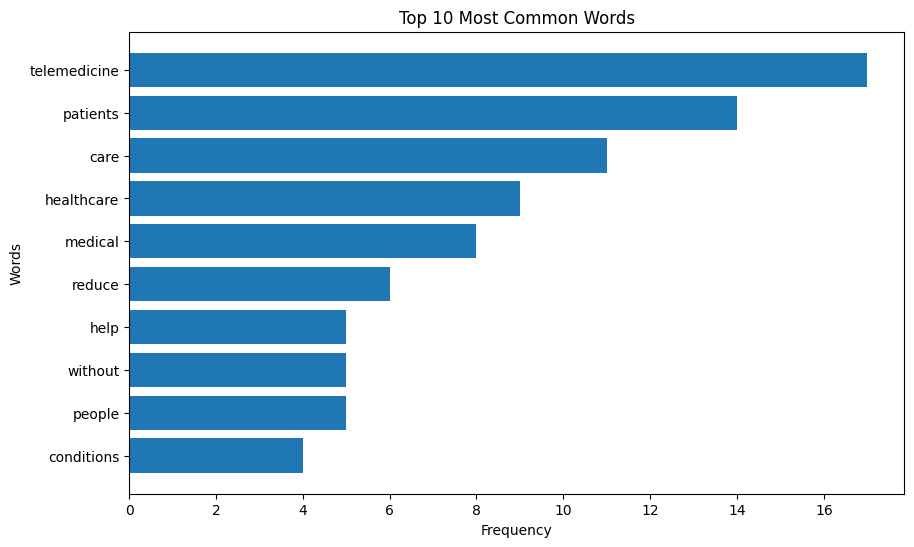

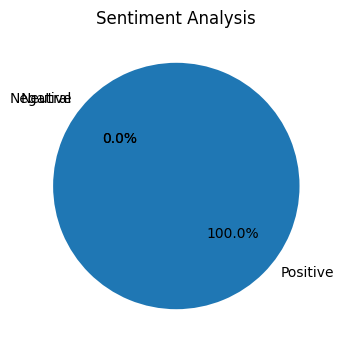

In [ ]:
if __name__ == '__main__':
    user_input = input("Enter text for analysis and summarization: ")
    analysis_result = analyze_text(user_input)
    lda_result = perform_topic_modeling(user_input)
    sentiment = perform_sentiment_analysis(user_input)
    summary = text_summarization(user_input)
    named_entities = perform_ner(user_input)

    print("\nAnalysis Results:")
    print(f"Sentences: {analysis_result['sentences']}")
    print(f"Total Word Count: {analysis_result['word_count']}")
    print(f"Unique Words: {analysis_result['unique_words']}")
    print("Most Common Words:")
    for word, frequency in analysis_result['most_common_words']:
        print(f"{word}: {frequency}")

    lda_result = perform_topic_modeling(user_input)
    print("\nTopics Identified:")
    for topic in lda_result['topics']:
        print(topic)

    sentiment = perform_sentiment_analysis(user_input)
    print(f"Sentiment: {sentiment}")

    summary = text_summarization(user_input)
    print(f"Text Summary: {summary}")

    named_entities = perform_ner(user_input)
    print("\nNamed Entities:")
    for entity, label in named_entities:
        print(f"{entity} - {label}")
    create_visual_report(analysis_result, lda_result, sentiment, summary)
    create_pdf_report(analysis_result, lda_result,summary,named_entities)